              Name  Class Roll Number Batch ID
Student Id                                    
CSE2201     Sourav                  1    CSE22
CSE2101      Rahul                  1    CSE21
ECE2202      Soham                  2    ECE22
ECE2203     Srijit                  3    ECE22
ECE2201     Souvik                  2    ECE22
                  Course Name  \
Course ID                       
C001       Python Programming   
C002                   Phsics   

                                              Marks Obtained  
Course ID                                                     
C001                                   CSE2201:95-CSE2101:73  
C002       CSE2201:65-CSE2101:78-ECE2202:34-ECE2203:95-EC...  
           Batch Name Department Name List Of Courses List Of Students
Batch Id                                                              
CSE22     CSE 2022-26             CSE       C001:C002          CSE2201
CSE21     CSE 2021-25             CSE       C001:C002          CSE2101
EC

Batch: CSE22
Student ID:CSE2201
Student name:Sourav
Class Roll Number: 1
Percentage: 80.0





Batch: CSE21
Student ID:CSE2101
Student name:Rahul
Class Roll Number: 1
Percentage: 75.5





Batch: ECE22
Student ID:ECE2202
Student name:Soham
Class Roll Number: 2
Percentage: 34

Student ID:ECE2203
Student name:Srijit
Class Roll Number: 3
Percentage: 95

Student ID:ECE2201
Student name:Souvik
Class Roll Number: 2
Percentage: 85







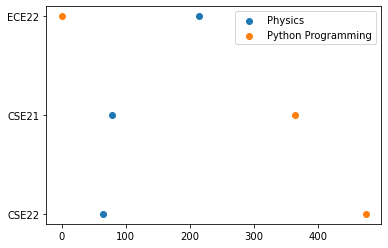

In [12]:
import pandas as pd
dfs=pd.read_csv("STUDENTS.csv",index_col="Student Id")
print(dfs)

dfc=pd.read_csv("COURSE.csv",index_col="Course ID")
print(dfc)

dfb=pd.read_csv("BATCH.csv",index_col="Batch Id")
print(dfb)

dfd=pd.read_csv("DEPARTMENT.csv",index_col="Department ID")
print(dfd)

n=dfc["Marks Obtained"].tolist()

k=[]
for i in n:
    k.append(i.split("-"))
b=False
py=[]
pp=[]
for i in k:
    if(b):
        py=i
    else:
        pp=i
    b=True
pp

p=[]
mksPhysics={}
mksPython={}
for i in py:
    p=i.split(':')
    mksPhysics[p[0]]=p[1]
for i in pp:
    p=i.split(':')
    mksPython[p[0]]=p[1]
print(mksPython)
def grade(k):
    if(int(k)>=90):
        ng[0]+=1
        return 'A'
    elif(int(k)>=80):
        ng[1]+=1
        return 'B'
    elif(int(k)>=70):
        ng[2]+=1
        return 'C'
    elif(int(k)>=60):
        ng[3]+=1
        return 'D'
    elif(int(k)>=50):
        ng[4]+=1
        return 'E'
    else:
        ng[5]+=1
        return 'F'

ng=[0,0,0,0,0,0]
with open("Results.txt","w") as r:
    for i in dfs.index.tolist():
        g=""
        gp=""
        if(i in mksPython.keys()):
            g=grade(mksPython[i])
        gp=grade(mksPhysics[i])
        r.writelines("Name: "+dfs.loc[i,"Name"]+"\nRoll number: "+str(dfs.loc[i,"Class Roll Number"])+"\nMarks in Physics: "+mksPhysics[i]
                +"\nGrade in Physics: "+gp+((("\nMarks in Python Programming: "+(mksPython[i])+("\nGrade in Python Programming: "+g)if (i in mksPython.keys()) else ""))+"\n"))
r.close()



import plotly.express as px
dic={"Grades":['A','B','C','D','E','F'],"Number of students":ng}
data=pd.DataFrame.from_dict(dic)
data
fig=px.histogram(data,x="Grades",y="Number of students",height=500,template="plotly_dark")
fig.show()

pct=[]
for i in dfs.index.tolist():
    if i in mksPython.keys():
        pct.extend([(int(mksPython[i])+int(mksPhysics[i]))/2])
    else:
        pct.extend([int(mksPhysics[i])])
dic1={"Student ID":dfs.index.tolist(),"Percentage":pct}
data1=pd.DataFrame.from_dict(dic1)
fig1=px.pie(data1,values="Percentage",names="Student ID")
fig1.show()

for i in dfb.index.tolist():
    print("Batch: "+i)
    k=0
    for j in dfs["Batch ID"].tolist():
        if(j==i):
            print("Student ID:"+dfs.index.tolist()[k]+"\nStudent name:"+dfs["Name"].tolist()[k]+"\nClass Roll Number: "
                  +str(dfs["Class Roll Number"].tolist()[k])+"\nPercentage: "+str(pct[k])+"\n")
        k+=1
    print("\n\n\n")

avgb=[]
for i in dfb.index.tolist():
    k=0
    a=0
    b=0
    for j in dfs["Batch ID"].tolist():
        if(j==i):
            a+=pct[k]
            b+=1
        k+=1
    avgb.extend([a/b])

dic2={"Batch name":dfb["Batch Name"].tolist(),"Average Percentage":avgb}
data2=pd.DataFrame.from_dict(dic2)
fig2=px.line(data2,x="Batch name",y="Average Percentage")
fig2.show()

totphy={}
totPython={}
for i in dfb.index.tolist():
    k=0
    k1=0
    for j in mksPhysics:
        if(j[:5]==i):            
            k+=int(mksPhysics[j])
        totphy[i]=k
        for j in mksPython:
            if(j[:5]==i):
                k1+=int(mksPython[j])
            totPython[i]=k1

import matplotlib.pyplot as plt
y=dfb.index.tolist()
x1=totphy.values()
x2=totPython.values()
co=["Physics","Python Programming"]
plt.scatter(x1,y)
plt.scatter(x2,y)
plt.legend(co)

